In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from glob import glob
from scipy.optimize import curve_fit
import scipy.odr as odr
import scipy.ndimage as im
from astropy.wcs import WCS
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [11]:
BiasPath=r'C:\Users\gjc10\Desktop\AstroData\data_2019\M91\bias'
FlatPath=r'C:\Users\gjc10\Desktop\AstroData\data_2019\M91\flats'


In [12]:
def BiasAvg(dataset):
    
    Sum=np.zeros([2048,2098],dtype=float)
    for bias in dataset:
        data=fits.getdata(bias)
        Sum+=data.astype(float)
    return Sum/len(dataset)
    

In [13]:
Biases=glob(BiasPath+r'\B130311_*')
print(Biases)

['C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0001.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0002.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0003.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0004.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0005.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0006.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0007.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0008.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0009.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0010.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0011.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\bias\\B130311_0012.fits', 'C:\\Users\\gjc10\\Desktop\

[[942.04761905 694.95238095 511.0952381  ... 415.57142857 415.61904762
  416.        ]
 [425.80952381 443.52380952 421.14285714 ... 418.9047619  418.71428571
  418.38095238]
 [427.47619048 445.38095238 422.28571429 ... 418.85714286 417.52380952
  419.76190476]
 ...
 [423.85714286 443.28571429 422.61904762 ... 416.71428571 417.19047619
  417.0952381 ]
 [422.61904762 443.57142857 423.14285714 ... 416.80952381 416.38095238
  416.42857143]
 [423.57142857 444.33333333 422.33333333 ... 416.9047619  416.61904762
  416.52380952]]


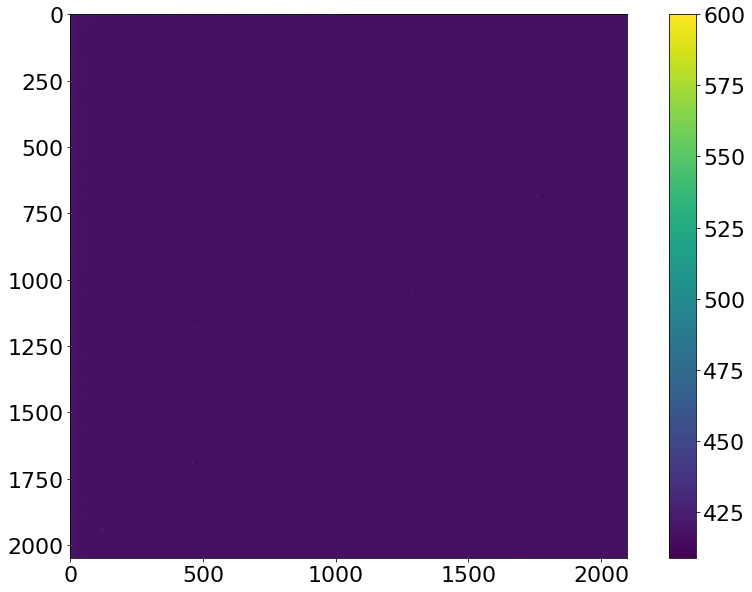

In [14]:
MasterBias=BiasAvg(Biases)
plt.imshow(MasterBias,vmax=600)
plt.colorbar()
print(MasterBias)


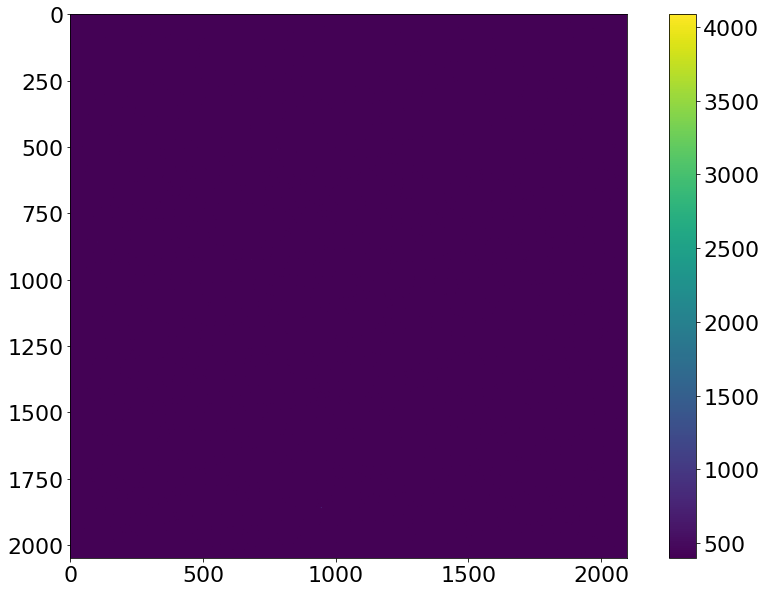

In [15]:
plt.imshow(fits.getdata(Biases[0]))
plt.colorbar()

In [16]:
flatsB=glob(FlatPath+r'\B\F130311_*')
flatsV=glob(FlatPath+r'\V\F130311_*')
flatsHa=glob(FlatPath+r'\Halpha_NII\F130311_*')

In [17]:
def MasterFlats(flatset,MBias):
    Sum=np.zeros([2048,2098],dtype=float)
    for flat in flatset:
        flatdata=fits.getdata(flat)
        Sum+=flatdata.astype(float)-MBias.astype(float)
    return Sum/np.mean(Sum[974:1074,999:1099])

In [18]:
mflatB=MasterFlats(flatsB,MasterBias)
mflatV=MasterFlats(flatsV,MasterBias)
mflatHa=MasterFlats(flatsHa,MasterBias)

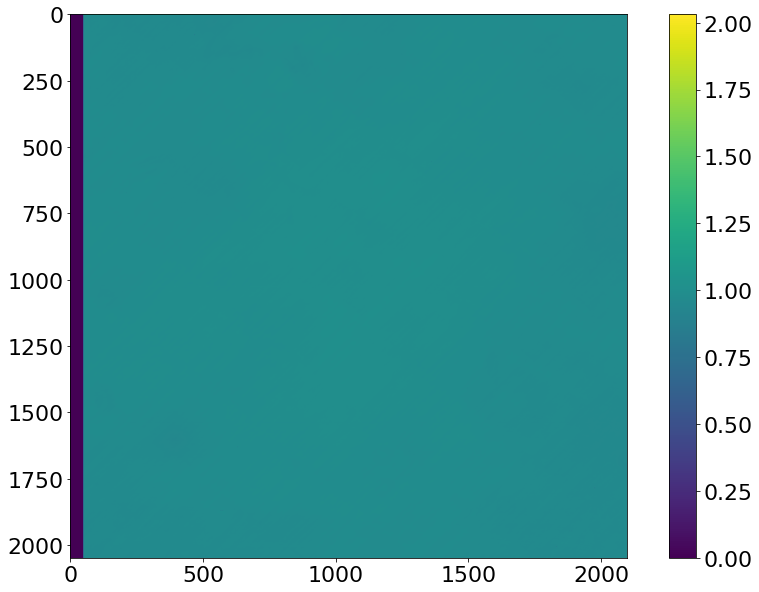

In [19]:
plt.imshow(mflatB)
plt.colorbar()

In [20]:
print(mflatB[::,1000])
#Dead pixels up to [::,49]
#therefore should crop all subsequent data frames from [::,50:2097]

[2.01982624 0.98563781 0.99493766 ... 0.97394448 0.9814117  0.97734272]


In [21]:
M91Path=r'C:\Users\gjc10\Desktop\AstroData\data_2019\M91\object'
M91B=glob(M91Path+r'\B\O130311_*')
M91V=glob(M91Path+r'\V\O130311_*')
M91Ha=glob(M91Path+r'\Halpha_NII\O130311_*')
print(M91V)

['C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\object\\V\\O130311_0123.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\object\\V\\O130311_0124.fits', 'C:\\Users\\gjc10\\Desktop\\AstroData\\data_2019\\M91\\object\\V\\O130311_0125.fits']


In [22]:
print(WCS(fits.open(M91B[0])[0].header))

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 180.6025  14.425556  
CRPIX : 1006.5  1006.5  
CD1_1 CD1_2  : 8.47196608965186e-05  1.11042971207493e-07  
CD2_1 CD2_2  : -1.127341066021e-07  8.47220705344157e-05  
NAXIS : 2098  2048


 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


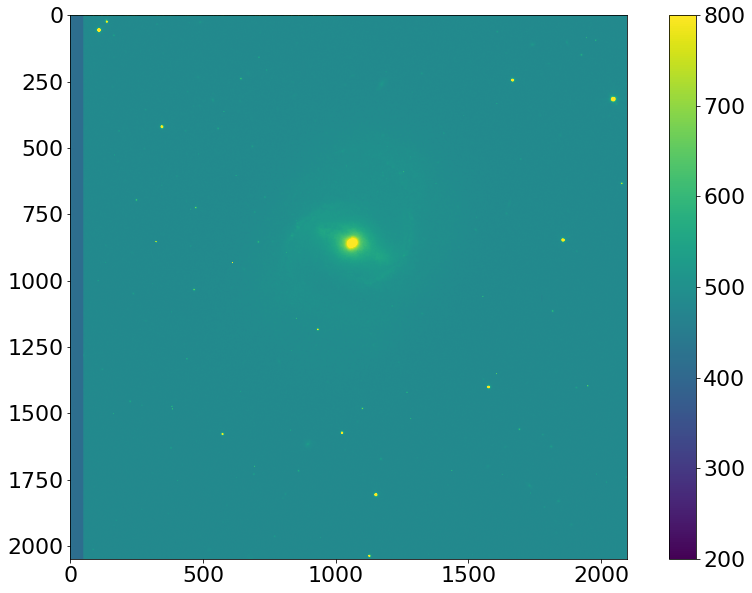

In [23]:
plt.imshow(fits.getdata(M91V[0]),vmax=800,vmin=200)
plt.colorbar()

In [24]:
print(fits.getdata(M91V[0]))

[[1078  784  584 ...  477  486  479]
 [ 431  448  423 ...  473  496  489]
 [ 431  437  419 ...  475  493  489]
 ...
 [ 423  442  417 ...  495  481  478]
 [ 425  441  418 ...  487  480  486]
 [ 416  446  417 ...  479  494  479]]


In [25]:
def Reductor(Im,mbias,mflat):
    imdata=fits.getdata(Im)
    final=(imdata[::,50:2097].astype(float)-mbias[::,50:2097].astype(float))/(mflat[::,50:2097].astype(float))
    return final

In [26]:
print(Reductor(M91B[0],MasterBias,mflatB))
print(np.min(Reductor(M91B[0],MasterBias,mflatB)))

[[ 1.17629077  3.19678148  7.45777979 ...  5.27446365  3.48267435
   9.55663091]
 [-4.71722037  0.48476851  3.62760836 ...  3.64222714  9.37199846
   0.29424058]
 [ 0.84563102  6.71877471 -0.29154212 ... -0.38278921  0.14365454
   3.51247374]
 ...
 [ 3.28723513 -0.04965924  0.29666297 ...  4.40641205 -0.73687369
  -0.19725209]
 [ 5.11726062  3.82179744  0.29866342 ...  0.98381007  7.39493362
  -5.53636426]
 [ 3.82370571 -2.58255449  5.58676095 ... -2.10213802  3.17656892
   0.39184442]]
-263.4554278229949


In [81]:
wcs=fits.open(r"C:\Users\gjc10\Downloads\new-image.fits")[0].header
print(np.shape(wcs))
#print(fits.open(M91B[0])[0].header)

(797,)


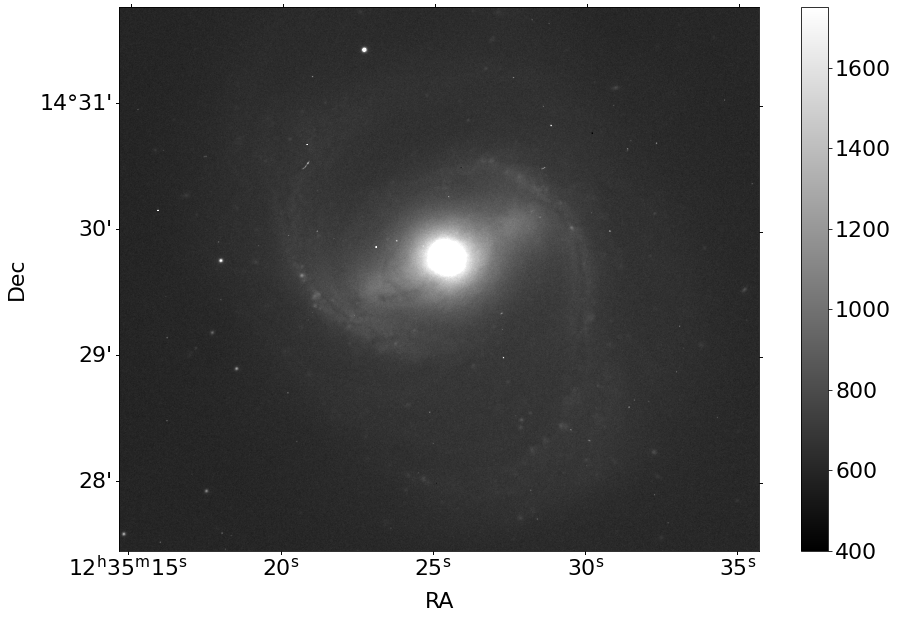

In [28]:
plt.subplot(projection=WCS(fits.open(r"C:\Users\gjc10\Downloads\new-image.fits")[0].header))
plt.imshow(Reductor(M91V[2],MasterBias,mflatV)+Reductor(M91V[0],MasterBias,mflatV)+Reductor(M91V[1],MasterBias,mflatV)\
           ,vmin=400,vmax=1750,cmap='gray')
plt.xlim(500,1500)
plt.ylim(400,1250)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('Dec')


 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


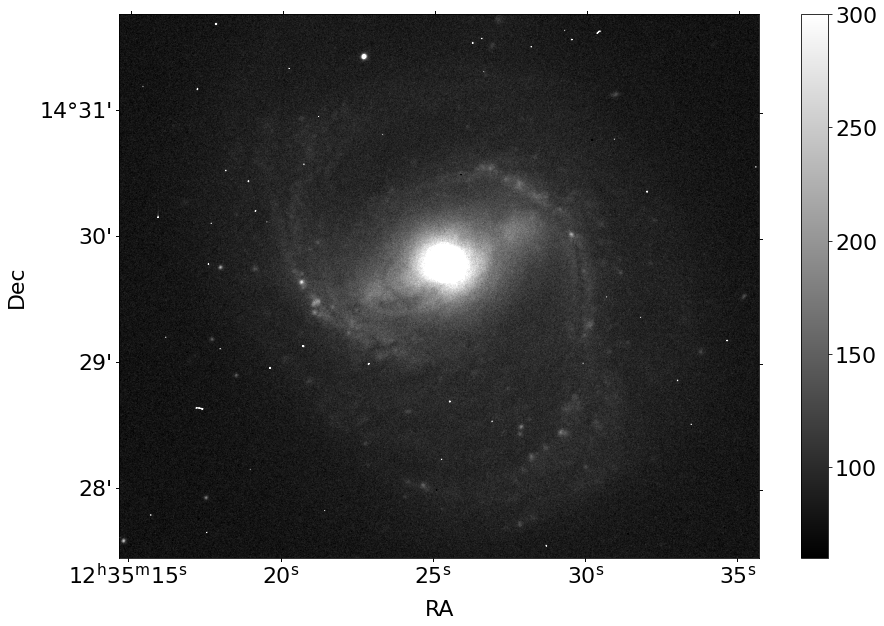

In [29]:
plt.subplot(projection=WCS(wcs))
plt.imshow(Reductor(M91B[2],MasterBias,mflatB)+Reductor(M91B[1],MasterBias,mflatB)+Reductor(M91B[0],MasterBias,mflatB)\
           ,vmin=60,vmax=300,cmap='gray')
plt.xlim(500,1500)
plt.ylim(400,1250)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


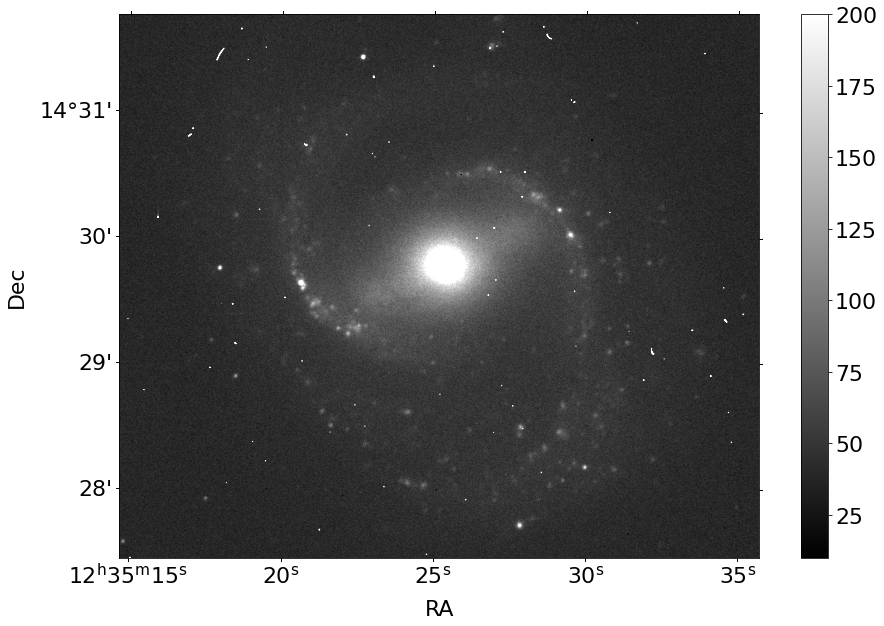

In [30]:
plt.subplot(projection=WCS(wcs))
plt.imshow(Reductor(M91Ha[0],MasterBias,mflatB)+Reductor(M91Ha[1],MasterBias,mflatB)\
           ,vmin=10,vmax=200,cmap='gray')
plt.xlim(500,1500)
plt.ylim(400,1250)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()

In [89]:
M91Pic=Reductor(M91V[0],MasterBias,mflatV)+Reductor(M91V[1],MasterBias,mflatV)+Reductor(M91V[2],MasterBias,mflatV)+\
Reductor(M91B[0],MasterBias,mflatB)+Reductor(M91B[1],MasterBias,mflatB)+Reductor(M91B[2],MasterBias,mflatB)+\
Reductor(M91Ha[0],MasterBias,mflatHa)+Reductor(M91Ha[1],MasterBias,mflatHa)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


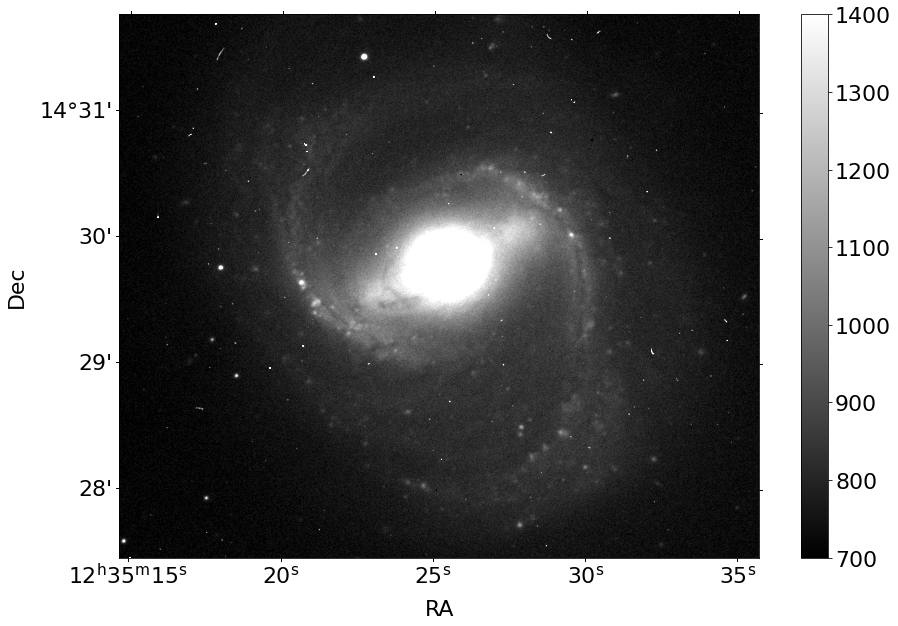

In [32]:
plt.subplot(projection=WCS(wcs))
plt.imshow(M91Pic,vmin=700,vmax=1400,cmap='gray')
plt.colorbar()
plt.xlim(500,1500)
plt.ylim(400,1250)
plt.xlabel('RA')
plt.ylabel('Dec')

In [166]:
M91VT=Reductor(M91V[0],MasterBias,mflatV)+Reductor(M91V[1],MasterBias,mflatV)+Reductor(M91V[2],MasterBias,mflatV)
#Going to make angular size function
#Take average and standard dev of a background section, defined in func
#For each row of image/ maybe a while loop. Stop loop when counts>background+3sig. Record point
#For same row going backward do the same
#Move row

In [34]:
def EdgeFind(pic,background):
    avgbkg=np.average(background)
    stdbkg=np.std(background)
    print(avgbkg)
    i=0
    j=0
    edges=[]
    while i<np.shape(pic)[1]:
        while j<np.shape(pic)[0]:
            allgal=[]
            if pic[i-1,j-1]>avgbkg+4*stdbkg:
                allgal.append([i,j])
            if len(allgal)>0:
                edges.append(allgal[0])
                edges.append(allgal[-1])
            #print(j)
            j+=1
        #print(i)
        i+=1
    return edges

In [36]:
def EdgeFind1(pic,bkg,tol):
    avgbkg=np.average(bkg)
    stdbkg=np.std(bkg)
    print(avgbkg)
    edges=[]
    for i in range(0,np.shape(pic)[0]-1):
        allgal=[]
        for j in range(0,np.shape(pic)[1]-1):
            if pic[i,j]>avgbkg+tol*stdbkg:
                allgal.append([i,j])
            #print(j)
        if len(allgal)>0:
            if allgal[0]!=allgal[-1]:
                if allgal[1][1]-allgal[0][1]<10:
                    1+1
                else:
                    edges.append(allgal[0])
                    edges.append(allgal[-1])
            #print(allgal)
        #print(i)
        #print(i)
    return edges

In [178]:
#np.shape(M91Pic)
#M91Pic[2047,::]
#ans=np.transpose(EdgeFind1(M91Pic,M91Pic[1750:2000,0:500],tol=4))
ans=np.transpose(EdgeFind1(M91VT[200:1400,500:1500],M91VT[1750:2000,0:500],tol=4))
ans1=np.transpose(EdgeFind1(M91VT[200:1400,500:1500],M91VT[1750:2000,0:500],tol=3))

#plt.plot(EdgeFind1(M91Pic,M91Pic[1750:2000,0:500])[0],EdgeFind1(M91Pic,M91Pic[1750:2000,0:500])[1])

601.0524006148937
601.0524006148937


In [179]:
def ellipsef(pars,x):
    return (((x[0]*np.cos(pars[4])+x[1]*np.sin(pars[4])-pars[0])**2)/(pars[2]**2))+\
(((x[0]*np.sin(pars[4])-x[1]*np.cos(pars[4])-pars[1])**2)/(pars[3]**2))-pars[5]**2

In [180]:
data=odr.Data([ans[1],ans[0]],y=1)
guess=[600,400,0.1,0.14,0.3,1000]
model=odr.Model(ellipsef,implicit=True)
fit=odr.ODR(data,model,guess)
fitout=fit.run()
print(fitout.beta)
data1=odr.Data([ans1[1],ans1[0]],y=1)
model1=odr.Model(ellipsef,implicit=True)
guess1=[600,400,0.1,0.14,0.3,500]
fit1=odr.ODR(data1,model,guess1)
fitout1=fit1.run()
print(fitout1.beta)

[ 6.87889484e+02 -4.44037434e+02  2.83387470e+07  3.96742993e+07
  2.98827831e-01  1.13295439e-05]
[ 5.79266956e+02 -5.69913598e+02  6.37621733e+07  8.92671103e+07
  7.76712846e-02  6.44482888e-06]


(0.0, 1100.0)

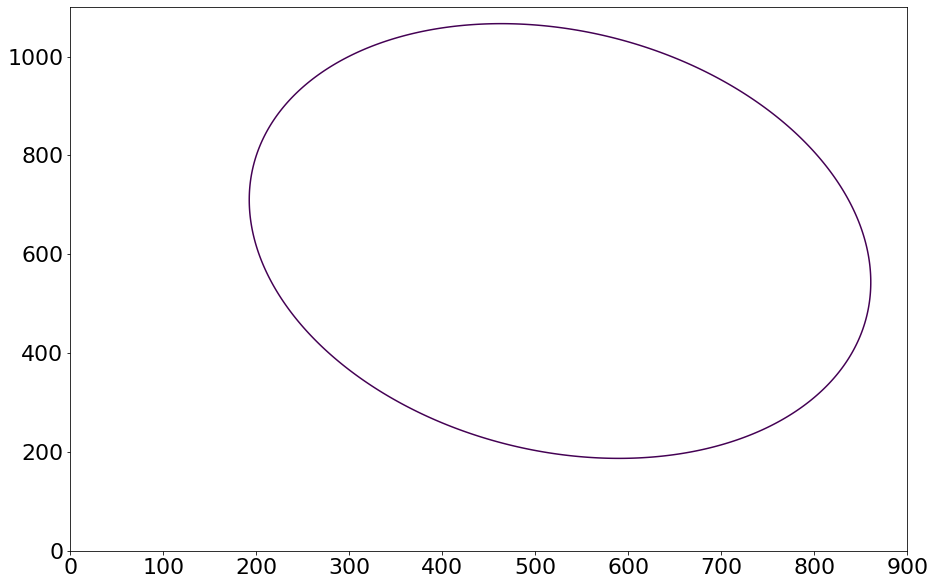

In [181]:
space=np.linspace(0,2000,2000)
plt.contour(np.meshgrid(space,space)[1],np.meshgrid(space,space)[0],ellipsef(fitout.beta,[np.meshgrid(space,space)[1],np.meshgrid(space,space)[0]]),[0])
plt.xlim(0,900)
plt.ylim(0,1100)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


3.253459452353445 4.554849367075244
4.164154464057842 5.829820672218425
4.450236795140808
17.121573531509757


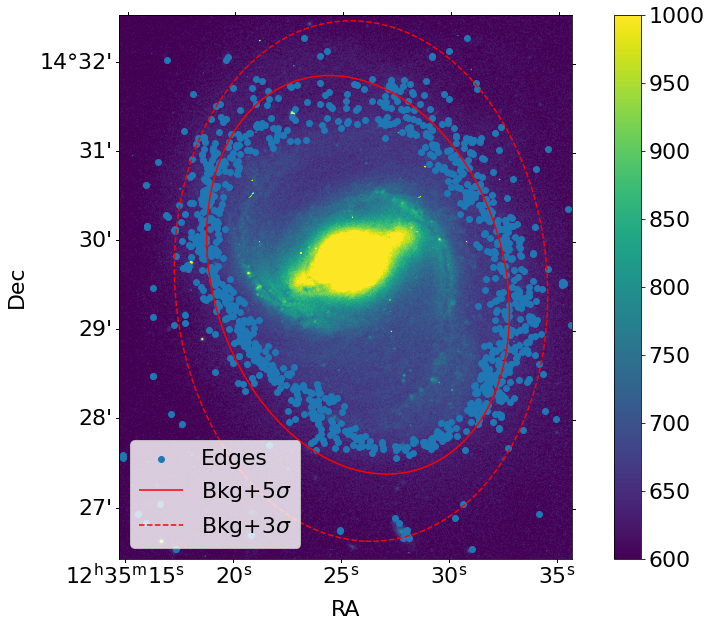

In [185]:
#print(ans[])
plt.subplot(projection=WCS(wcs)[200:1400,500:1500])
points=plt.scatter(ans[1],ans[0],label='Edges')
plt.imshow(M91VT[200:1400,500:1500],vmin=600,vmax=1000)
plt.colorbar()
space=np.linspace(0,2000,2000)
CS1=plt.contour(np.meshgrid(space,space)[0],np.meshgrid(space,space)[1],ellipsef(fitout.beta,\
            [np.meshgrid(space,space)[0],np.meshgrid(space,space)[1]]),[0],colors='r')
CS2=plt.contour(np.meshgrid(space,space)[0],np.meshgrid(space,space)[1],ellipsef(fitout1.beta,\
            [np.meshgrid(space,space)[0],np.meshgrid(space,space)[1]]),[0],colors='r',linestyles='dashed')
#plt.contour(np.meshgrid(space,space)[0],np.meshgrid(space,space)[1],ellipse([1000,1000,1,1,40,0.2],\
            #[np.meshgrid(space,space)[0],np.meshgrid(space,space)[1]]),[0],colors='green')
CS1.collections[0].set_label('Bkg+5$\sigma$')
CS2.collections[0].set_label('Bkg+3$\sigma$')
plt.xlim(0,1000)
plt.ylim(0,1200)
plt.xlabel('RA')
plt.ylabel('Dec')
#plt.scatter([np.abs(fitout1.beta[1])],[np.abs(fitout1.beta[0])],marker='x',color='r',s=100,label='Center')
plt.legend(loc='lower left')
#plt.plot(fitout.b)
print(fitout.beta[2]*fitout.beta[5]*0.304*(2/60),fitout.beta[3]*fitout.beta[5]*0.304*(2/60))
print(fitout1.beta[2]*fitout1.beta[5]*0.304*(2/60),fitout1.beta[3]*fitout1.beta[5]*0.304*(2/60))
print((fitout1.beta[4]/np.pi)*180)
print((fitout.beta[4]/np.pi)*180)
#plt.axvline(x=500,ymin=0,ymax=2*np.absolute(fitout.beta[2]*fitout.beta[5])/1200)
#this is to check to see if they are good

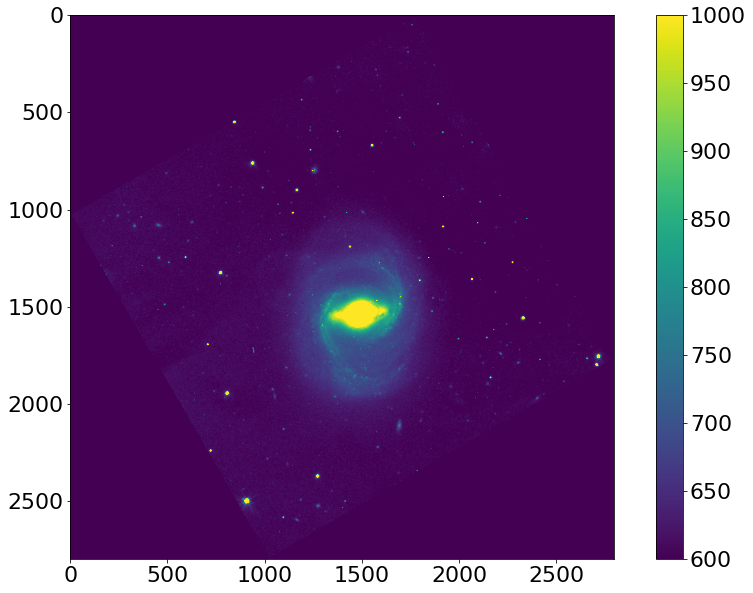

In [187]:
RotPic=im.rotate(M91VT,-150)
plt.imshow(RotPic,vmin=600,vmax=1000)
plt.colorbar()
#plt.xlim(800,2200)
#plt.ylim(900,2100)

In [205]:
RotEdge=np.transpose(EdgeFind1(RotPic[900:2200,900:2000],RotPic[2000:2300,800:1000],4))
#print(RotEdge)
Rotdata=odr.Data([RotEdge[1],RotEdge[0]],y=1)
Rotguess=[600,600,0.1,0.14,np.pi/2,2000]
Rotmodel=odr.Model(ellipsef,implicit=True)
Rotfit=odr.ODR(Rotdata,Rotmodel,Rotguess)
Rotfitout=Rotfit.run()
print(Rotfitout.beta)

608.5719870147831
[ 6.88251897e+02 -5.57504898e+02  4.25081013e+07  5.95113346e+07
  1.79818650e-01  7.52881925e-06]


3.2430295598167707 4.540240831920535
688.251896517919 -557.5048981171549
10.30284972303808


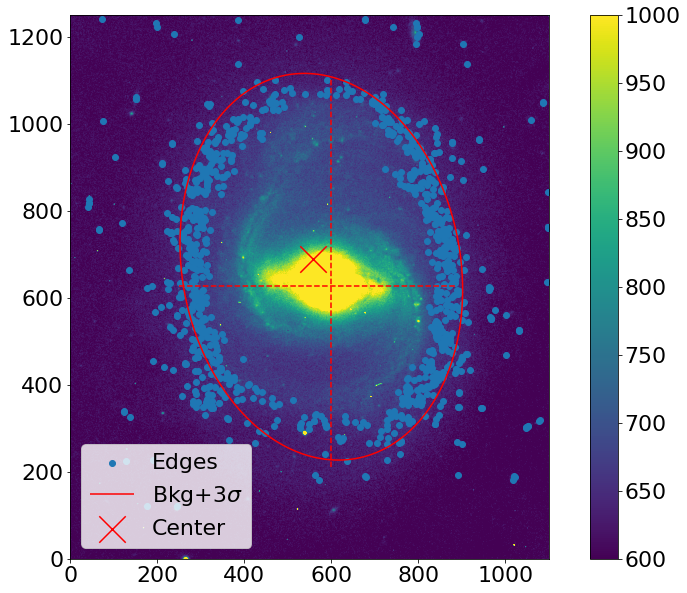

In [214]:
#plt.subplot(projection=WCS(wcs)[900:2200,900:2000])
plt.imshow(RotPic[900:2200,900:2000],vmin=600,vmax=1000)
plt.colorbar()
plt.scatter(RotEdge[1],RotEdge[0],label='Edges')
space1=np.linspace(0,2000,2000)
CS3=plt.contour(np.meshgrid(space1,space1)[0],np.meshgrid(space1,space1)[1],ellipsef(Rotfitout.beta,\
            [np.meshgrid(space1,space1)[0],np.meshgrid(space1,space1)[1]]),[0],colors='r')
CS3.collections[0].set_label('Bkg+3$\sigma$')
plt.xlim(0,1100)
plt.ylim(0,1250)
print(Rotfitout.beta[2]*Rotfitout.beta[5]*(0.304)*(2/60),Rotfitout.beta[3]*Rotfitout.beta[5]*(0.304)*(2/60))
plt.axvline(x=600,ymin=210/1250,ymax=2*Rotfitout.beta[3]*Rotfitout.beta[5]/1250+210/1250,\
            linestyle='--',color='r')
plt.axhline(y=627,xmin=250/1100,xmax=2*Rotfitout.beta[2]*Rotfitout.beta[5]/1100+250/1100,\
            linestyle='--',color='r')
plt.scatter([np.abs(Rotfitout.beta[1])],[np.abs(Rotfitout.beta[0])],marker='x',label='Center',color='r',s=700)
plt.legend(loc='lower left')
print(Rotfitout.beta[0],Rotfitout.beta[1])
print(180*Rotfitout.beta[4]/np.pi)



In [207]:
print('adjusted major axis=',2*Rotfitout.beta[3]*Rotfitout.beta[5]*0.304*(1/60))
print('minor axis=',2*Rotfitout.beta[2]*Rotfitout.beta[5]*0.304*(1/60))

adjusted major axis= 4.540240831920535
minor axis= 3.2430295598167707


## Photutils Isophote Tool ##

In [53]:
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture
from photutils.isophote import Ellipse
from photutils.isophote import build_ellipse_model
geo = EllipseGeometry(x0=1000, y0=800, sma=430, eps=0.3,
                           pa=((110/180)*np.pi))

(<matplotlib.patches.Ellipse at 0x17e38f14df0>,)

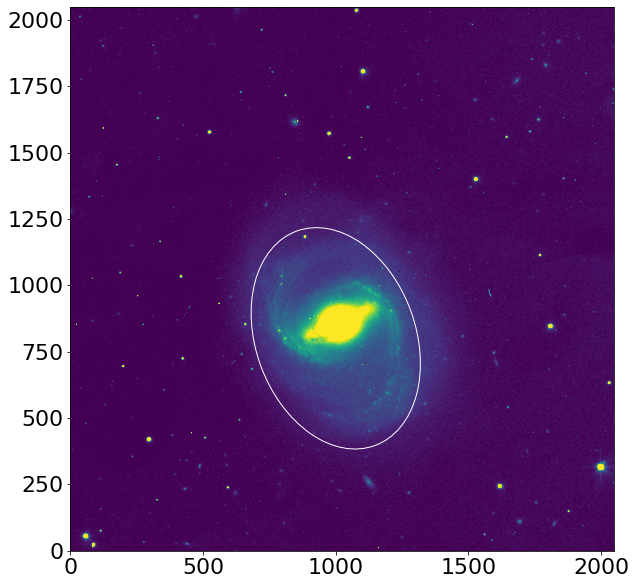

In [216]:
apsel=EllipticalAperture((geo.x0,geo.y0),geo.sma,geo.sma*(1-geo.eps),geo.pa)
plt.imshow(M91VT,origin='lower',vmin=600,vmax=1000)
apsel.plot(color='white')


In [220]:
ellipse = Ellipse(M91VT, geo)
#print(M91Pic.)
isos = ellipse.fit_image()
#print(isos.sma)
model_image = build_ellipse_model(M91VT.shape, isos)
residual = M91Pic - model_image

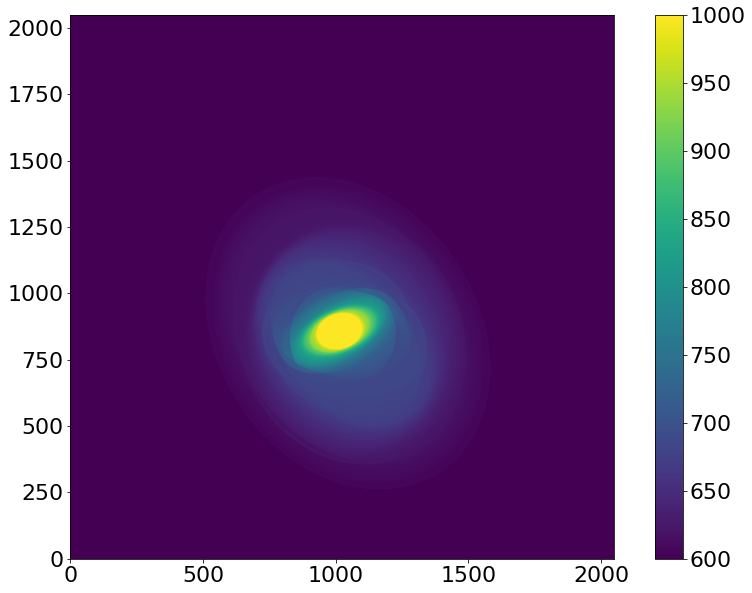

In [240]:
#plt.imshow(RotPic[900:2200,900:2000],origin='lower',vmin=700,vmax=1200)
plt.imshow(model_image,vmin=600,vmax=1000,origin='lower')
plt.xlim()
plt.colorbar()

Text(0.5, 1.0, 'Ellipse Model')

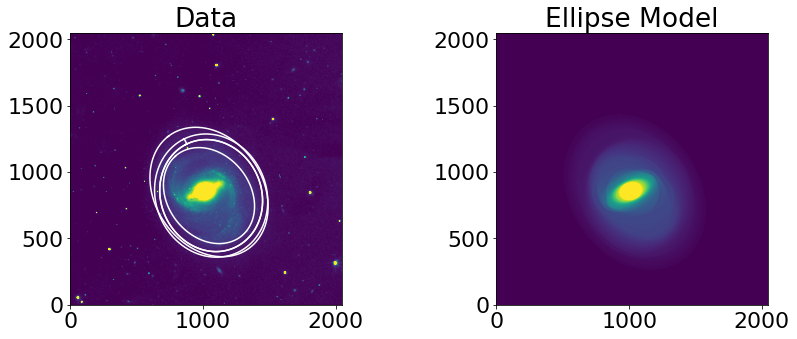

In [224]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
#fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(M91VT, origin='lower',vmin=600,vmax=1000)
ax1.set_title('Data')

smas = np.linspace(400, 500, 5)
for sma in smas:
    iso = isos.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower',vmin=600,vmax=1000)
ax2.set_title('Ellipse Model')


Text(0, 0.5, 'Ellipticity')

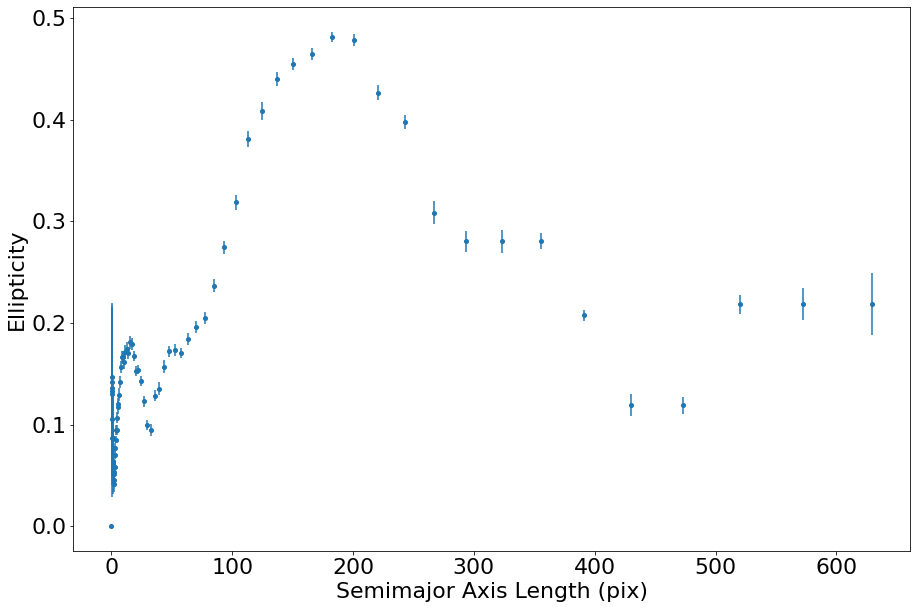

In [225]:
plt.errorbar(isos.sma, isos.eps, yerr=isos.ellip_err,
             fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

Text(0, 0.5, 'PA (deg)')

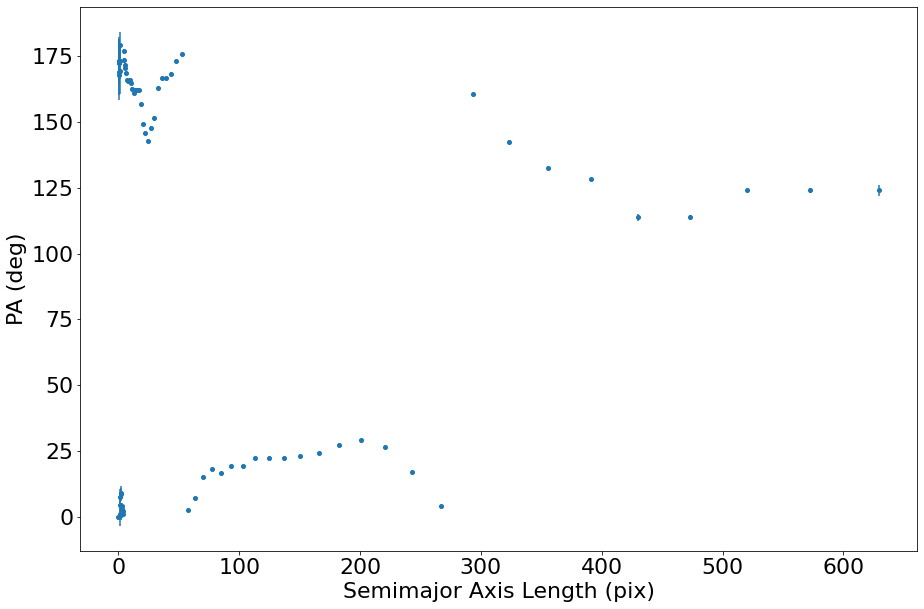

In [226]:
plt.errorbar(isos.sma, isos.pa / np.pi * 180.0,
             yerr=isos.pa_err / np.pi * 80.0, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')


Text(0, 0.5, 'x0')

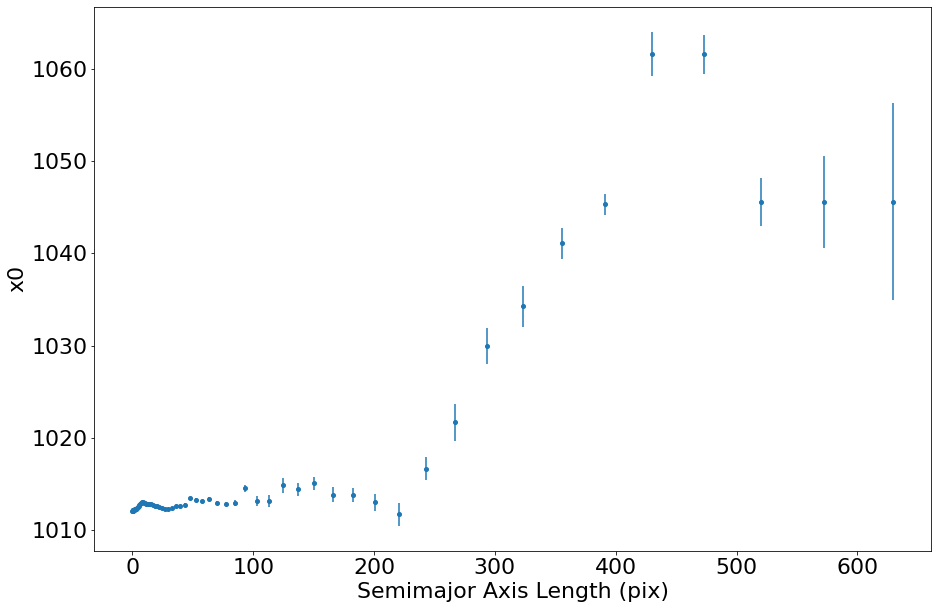

In [227]:
plt.errorbar(isos.sma, isos.x0, yerr=isos.x0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')


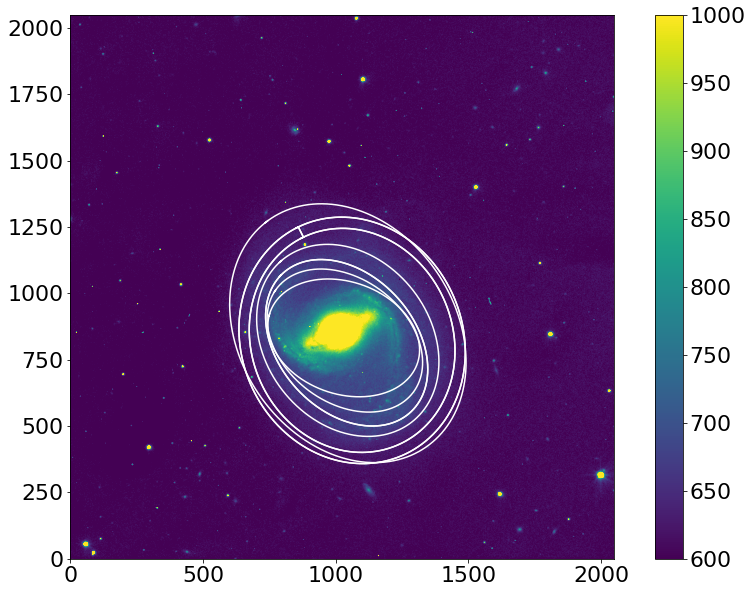

In [239]:
plt.imshow(M91VT,vmin=600,vmax=1000,origin='lower')
plt.colorbar()
smas = np.linspace(300, 500, 10)
for sma in smas:
    iso = isos.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='white')
#print(isos.to_table)

In [232]:
print(isos.to_table()[69])
print(isos.to_table()[70])
print(np.average(M91VT[1500:2000,1750:2000])+2*np.std(M91VT[1500:2000,1750:2000]))
#For 3StD
#This gives an SMA of 380 therefore Ma of 760 pixels, unadjusted this is 3.863 arc mins
#Semi minor is sma(1-eps)=380*(1-0.24)=288 therefore minor=578 pixels unadjusted 2.92arc mins

#For 2Std
#Sma is 390 therefore 780pixels MA, unadjusted this is 3.952
#Semi minor is then 390(1-0.21)=308 unadjusted this is 3.12


       sma              intens           intens_err         ellipticity       ellipticity_err            pa               pa_err              grad             grad_error          grad_rerror             x0               x0_err               y0              y0_err       ndata nflag niter stop_code
                                                                                                        deg                deg                                                                                                                                                                           
----------------- ----------------- ------------------- ------------------- -------------------- ------------------ ------------------ ------------------ -------------------- ------------------- ------------------ ------------------ ----------------- ------------------ ----- ----- ----- ---------
355.3719008264462 669.9723451514634 0.41758031581028243 0.28031290927294045 0.007856957867673063 132.61770

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


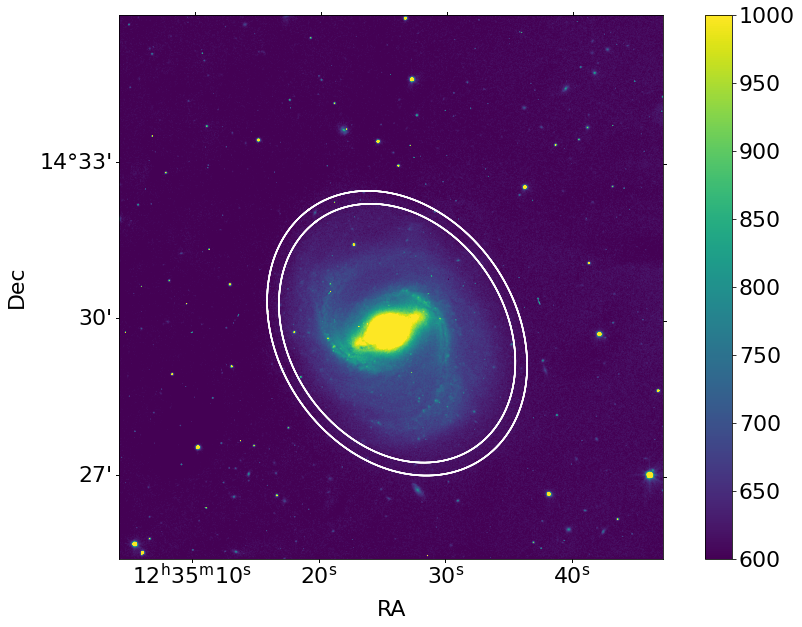

In [234]:
plt.subplot(projection=WCS(wcs))
plt.imshow(M91VT,vmin=600,vmax=1000)
plt.xlabel('RA')
plt.ylabel('Dec')
smas = np.linspace(500, 600, 10)
for sma in smas:
    iso = isos.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    plt.plot(x, y, color='white')
plt.colorbar()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '2013-03-12        ' to '2013-03-12T00:00:00.0''. [astropy.wcs.wcs]


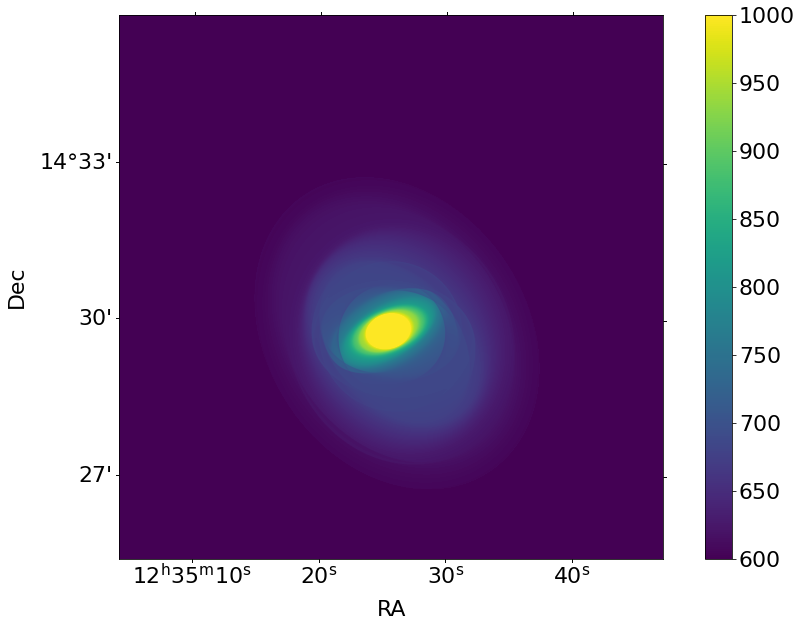

In [235]:
plt.subplot(projection=WCS(wcs))
plt.imshow(model_image,vmin=600,vmax=1000)
plt.xlabel('RA')
plt.ylabel('Dec')
#plt.imshow(M91Pic,vmin=700,vmax=1200)
plt.colorbar()

In [238]:
print((isos.tflux_e[-1]/2)*(1e-8))
print(isos.tflux_e[-5]*(1e-8))
print(isos.tflux_e[-6]*(1e-8))
print(isos.sma[-5]*(0.304)*(2/60))
print(isos.sma[-6]*(0.304)*(2/60))
print((1-isos.eps[-5])*isos.sma[-5]*(0.304)*(2/60))

3.257868087490227
3.673396768707054
2.8337370048153128
4.357333333333333
3.961212121212121
3.8387921605743993


## Modifying Edge finder to mask stars ##

In [82]:
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from math import isclose

In [83]:
bkgstd=mad_std(M91Pic)
daofinds= DAOStarFinder(fwhm=6,threshold=4*bkgstd)
sources=daofinds.find_stars(M91Pic)
starpos=np.transpose([sources['xcentroid'],sources['ycentroid']])
stars=CircularAperture(starpos,r=6)
starmask=stars.to_mask()
print(starmask[1].bbox)


BoundingBox(ixmin=2038, ixmax=2051, iymin=-4, iymax=9)


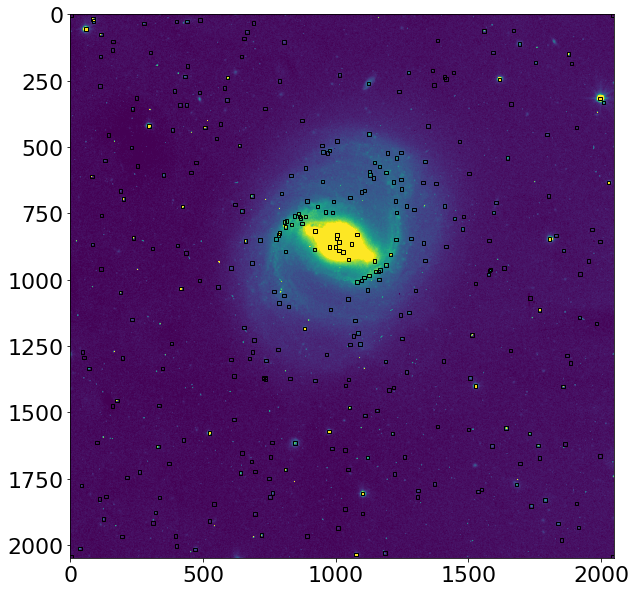

In [84]:
for mask in starmask:
    mask.bbox.plot()
    
plt.imshow(M91Pic,vmin=700,vmax=1200)

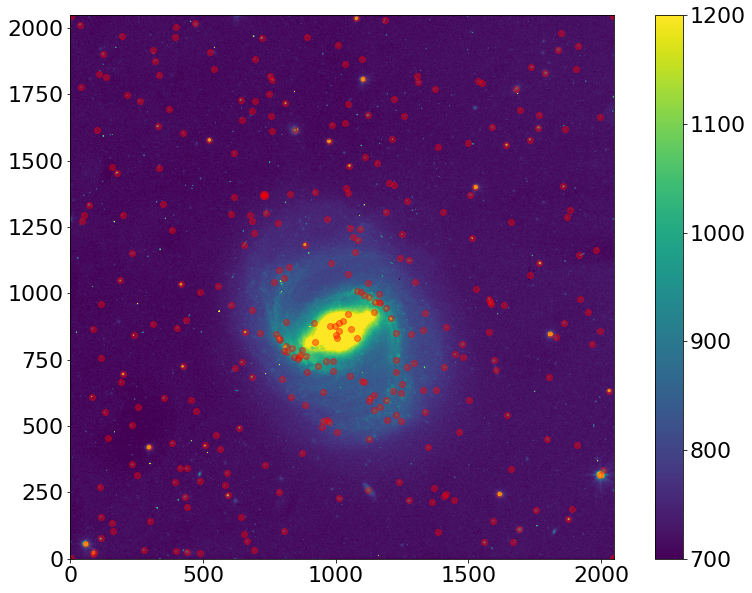

In [85]:
plt.imshow(M91Pic,vmin=700,vmax=1200,origin='lower')
plt.colorbar()
plt.scatter(sources['xcentroid'],sources['ycentroid'],color='r',alpha=0.4)

In [86]:
def EdgeFindV2(pic,bkg,tol):
    pic0=pic
    bkgstd=mad_std(bkg)
    removed=[]
    daofinds= DAOStarFinder(fwhm=8,threshold=4*bkgstd)
    sources=daofinds.find_stars(pic0)
    #print(sources)
    starpos=[sources['xcentroid'],sources['ycentroid']]
    #print(starpos[0])
    stars=CircularAperture(starpos,r=8)
    #print(np.ndenumerate(pic0))
    for l in range(0,np.shape(pic0)[0]-1):
        for m in range(0,np.shape(pic0)[1]-1):
            for pos in np.transpose(stars.positions):
                if isclose(l,pos[0],abs_tol=7)==True and isclose(m,pos[1],abs_tol=7)==True:
                    pic0[l,m]=0
                    removed.append([l,m])
                    #print('removed',l,m)
    avgbkg=np.average(bkg)
    stdbkg=np.std(bkg)
    #print(avgbkg)
    edges=[]
    
    for i in range(0,np.shape(pic0)[0]-1):
        allgal=[]
        for j in range(0,np.shape(pic0)[1]-1):
            if pic[i,j]>avgbkg+tol*stdbkg:
                allgal.append([i,j])
            #print(j)
            if len(allgal)!=0:
                edges.append(allgal[0])
                edges.append(allgal[-1])
            #print(allgal)
            #print(allgal)
        #print(i)
    plt.imshow(pic0,vmin=700,vmax=1200)
    #print(removed)
    #plt.scatter(np.transpose(removed)[0],np.transpose(removed)[1])
    #plt.scatter(starpos[0],starpos[1])
    return edges

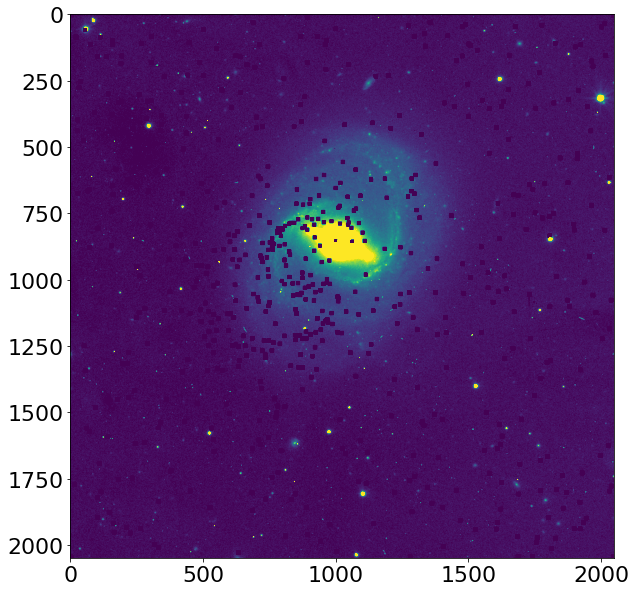

In [87]:
NewEdges=np.transpose(EdgeFindV2(M91Pic,M91Pic[1750:2000,0:500],tol=4))

[ 1.61301138e+02 -1.19613829e+03  1.63415404e+09  1.63415641e+09
 -4.70636934e-01 -4.48825953e-07]


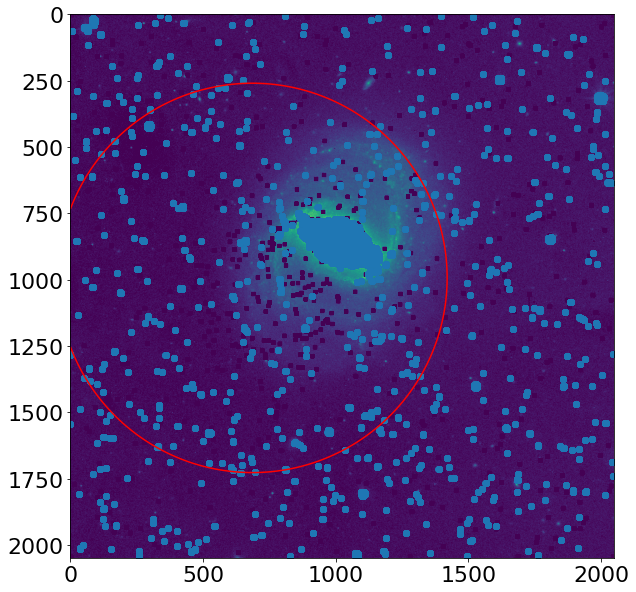

In [88]:

plt.scatter(NewEdges[1],NewEdges[0])
#plt.scatter(sources['xcentroid'],sources['ycentroid'],color='r',alpha=0.4)
plt.imshow(M91Pic,vmin=700,vmax=1200)
dataNew=odr.Data([NewEdges[1],NewEdges[0]],y=1)
guessNew=[1000,800,0.1,0.1,-1,1]
modelNew=odr.Model(ellipsef,implicit=True)
fitNew=odr.ODR(dataNew,modelNew,guessNew)
fitoutNew=fitNew.run()
print(fitoutNew.beta)
space3=np.linspace(0,2000,2000)
plt.contour(np.meshgrid(space3,space3)[0],np.meshgrid(space3,space3)[1],ellipsef(fitoutNew.beta,\
            [np.meshgrid(space3,space3)[0],np.meshgrid(space3,space3)[1]]),[0],colors='r')